In [10]:
import networkx as nx
import matplotlib 
import random
import matplotlib.pyplot as plt

In [9]:
Profiltypes= {"classique":0.4,"marginal":0.3,"vieux":0.1,"geek":0.2}
def listprofil(probaprofil,n):
    """dict[str:int]*int->list[str]
    renvoie une liste de n personnes avec leur profil"""
    LR=[]
    nbr={"classique":round(n*probaprofil["classique"]),
         "marginal":round(n*probaprofil["marginal"]),
        "vieux":round(n*probaprofil["vieux"]),
        "geek":round(n*probaprofil["geek"])}
    nbr=[]
    for i in probaprofil.keys():
        nbr=nbr+[i for n in range(round(n*probaprofil[i]))]
    for i in range(n):
        a=random.choice(nbr)
        LR.append(a)
        nbr.remove(a)

    return LR
listprofil(Profiltypes,10)       
        

['marginal',
 'marginal',
 'marginal',
 'geek',
 'classique',
 'classique',
 'classique',
 'vieux',
 'classique',
 'geek']

In [15]:
Profiltypes= {"classique":0.4,"marginal":0.3,"vieux":0.1,"geek":0.2}
ProfilSpecs={"classique":(2/13,0.3,0.7),
             "marginal":(1/15,0.1,0.4),
             "vieux":(1/13,0.6,0.9),
             "geek":(4/13,0.7,1)} #format nom:(proportion d'amis, proba d'envoyer, proba de recevoir)
def simple_graph_generator_profils(listprofils, profilspecs):
    """list[str]*dict[str:tuple[int;int;int]]->list[list[int]]
    renvoie une matrice liaison en tenant compte des différents profils"""
    n=len(listprofils)
    profils=list(profilspecs.keys())
    LR=[[0 for elt in range(n)] for i in range(n)]
    nbr_moy=dict((i,round(n*ProfilSpecs[i][0])) for i in profils) 
    for elt in range(n):
        amis=choisir_amis(elt,n,nbr_moy[listprofils[elt]])
        for elt2 in amis:
            tolerance=random.randint(0,n*1/10)
            if nbr_amis(LR[elt]) <= nbr_moy[listprofils[elt]]+tolerance and \
                nbr_amis(LR[elt2]) <= nbr_moy[listprofils[elt2]]+tolerance:
                LR[elt][elt2]=1
                LR[elt2][elt]=1
    return LR
            

In [14]:
random.randint(0,10)

8

In [11]:
import math
def nbr_amis(personne):
    """list[int]->int
    renvoie le nombre d'amis d'une personne à partir d'une liste de 0 et de 1"""
    nbr=0
    for elt in range(len(personne)):
        if elt==1:
            nbr+=1
    return nbr

def choisir_amis(no_personne,n,nbr_moy):
    """int*int->list[int]
    renvoie une liste avec les amis choisis d'une personne"""
    LR=[]
    exclusion= [i for i in range(n) if i!=no_personne]
    last=0
    for elt in range(nbr_moy):
        last=random.choice(exclusion)
        LR.append(last)
        exclusion.remove(last)
    return LR

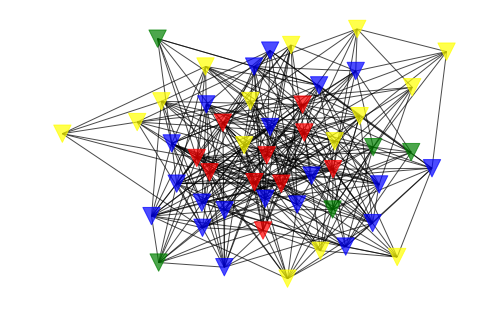

In [24]:
Profiltypes= {"classique":0.4,"marginal":0.3,"vieux":0.1,"geek":0.2}
ProfilSpecs={"classique":(2/13,0.3,0.7),
             "marginal":(1/15,0.1,0.4),
             "vieux":(1/13,0.6,0.9),
             "geek":(4/13,0.7,1)}
color={"classique":'blue',"marginal":'yellow',"vieux":'green',"geek":'red'}
listeprofils=listprofil(Profiltypes,50)
def draw_liaisons_profils(l,color,listeprofils):
    """list[list[int]]->NoneType
    renvoi le dessin des liaisons à partir de la matrice liaisons"""
    G=nx.Graph()
    i=len(l)
    node_colors = [color[i] for i in listeprofils]
    G.add_nodes_from([i for i in range(i)])
    for elt in range(len(l)):
        for elt2 in range(len(l[elt])):
            if l[elt][elt2]==1:
                G.add_edge(elt,elt2)
    pos = nx.spring_layout(G)
    #nx.draw_networkx_nodes(G, pos=pos, node_color=node_colors, nodesize=100, alpha = 0.7)
    #nx.draw_networkx_edges(G, pos=pos)
    return nx.draw(G, pos=pos, node_color=node_colors, node_shape='v', alpha = 0.7)
draw_liaisons_profils(simple_graph_generator_profils(listeprofils,ProfilSpecs),color,listeprofils)  

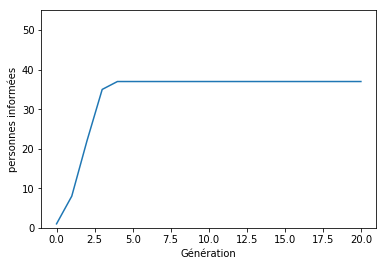

[1, 8, 22, 35, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37]


In [72]:
ProfilSpecs={"classique":(2/13,0.3,0.7),
             "marginal":(1/15,0.1,0.4),
             "vieux":(1/13,0.6,0.9),
             "geek":(4/13,0.7,1)}

def plot_information(L,taille):
    '''
    list[int]-> None
    Visualise l'évolution du opartage de l'information au cours du temps
    '''
    plt.figure()
    plt.plot(L)
    plt.ylim(0,taille+5)
    plt.ylabel("personnes informées")
    plt.xlabel("Génération")
    plt.show()
    return

def passage_info_simple_profils(liaisons,info,stock_info,nbr,profilspecs,listeprofils):
    """list[list[int]]*list[int]*list[int]*int->list[int]
    Transmet l'information à la géneration suivante"""
    new_info=[0 for i in info]
    new_stock_info=[i for i in stock_info]
    for i in range(len(info)):
        if info[i]==1:
            for a in range(len(liaisons[i])):
                rdm=random.random()
                if liaisons[i][a]==1 and rdm<profilspecs[listeprofils[i]][1]: #a modifier pour modèle complexe
                    if new_stock_info[a]<1 and rdm<profilspecs[listeprofils[i]][2]: #a modifier pour modèle complexe
                        new_info[a]=1
                        nbr+=1
                        new_stock_info[a]+=1
                    elif rdm<profilspecs[listeprofils[i]][2]:
                        new_stock_info[a]+=1
                
    return new_info,new_stock_info,nbr

def donneur_info(population,donneur):
    """int*int->list[int]+list[int]
    donne les matrices info et stock_info"""
    info=[0 if i!= donneur else 1 for i in range(population)]
    return info

def nbr_evolution_profils(liaisons,info,stock_info,nbr,profilspecs, listeprofils, n):
    """list[list[int]]*list[int]*list[int]*int*int->int
   renvoie la liste du nombre de personnes ayant l'information à chaque géneration"""
    Ltemp=[i for i in info]
    stocktemp=[i for i in stock_info]
    nbrtemp=nbr
    NBR=[1]
    for i in range(n):
        temp=passage_info_simple_profils(liaisons,Ltemp,stocktemp,nbrtemp, ProfilSpecs, listeprofils)
        Ltemp=[i for i in temp[0]]
        stocktemp=[i for i in temp[1]]
        nbrtemp=temp[2]
        NBR.append(nbrtemp)
    return NBR

Profiltypes= {"classique":0.2, "marginal":0.7,"vieux":0,"geek":0.1}
ProfilSpecs={"classique":(2/13,0.3,0.7),
             "marginal":(1/15,0.1,0.4),
             "vieux":(1/13,0.6,0.9),
             "geek":(4/13,0.5,1)}
listeprofils=listprofil(Profiltypes, 50)
generate=simple_graph_generator_profils(listeprofils, ProfilSpecs)
donneur=donneur_info(50,listeprofils.index("geek"))
stock=[i for i in donneur]
listevo=nbr_evolution_profils(generate,donneur,stock,1,ProfilSpecs, listeprofils, 20)
plot_information(listevo,50)
print(listevo)